In [68]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
%matplotlib inline


In [69]:
def parse_tb_logs(nb_folds, metrics_path, metrics_to_plot):
    values = defaultdict(list)

    for fold_nb in range(nb_folds):
        fold_string = f"fold_{fold_nb}"
        print(fold_string,  end = ' ')
        event_acc = EventAccumulator(join(metrics_path, fold_string))
        event_acc.Reload()
        #print(event_acc.Tags())
        for tag in metrics_to_plot:
            try:
                _, step_nums, vals = zip(*event_acc.Scalars(tag))
                print(f'{tag} {len(vals)}, ',  end = '')
                values[tag].append(list(np.around(vals, 4)))
                values[f'{tag}_step'].append(list(step_nums))
                values['fold_nb'].append(fold_nb)
            except:
                print(f"warning: {tag} not in logs")
                pass
        print()
    return values

def interpolate_values(metrics_to_plot, values, tot_num_values=100):
    interp_values = defaultdict(list)

    for metric_name in metrics_to_plot:
        x = np.linspace(0, max(max(values[f'{metric_name}_step'])), num=tot_num_values)
        temp_lists=[]
        for steps, vals in zip(values[f'{metric_name}_step'], values[metric_name]):
            temp_lists.append(np.interp(x, steps, vals))
        interp_values[f'{metric_name}_interp_steps'] = list(x)
        interp_values[f'{metric_name}_interp_mean'] = np.mean(temp_lists, axis=0)
        interp_values[f'{metric_name}_interp_var'] = np.var(temp_lists, axis=0)
    
    return interp_values

def plot_metrics(metrics_to_plot, interp_values_df, ax, label):
    for i, metric_name in enumerate(metrics_to_plot):
        epochs = interp_values_df[f'{metric_name}_interp_steps'] 
        mean_val = interp_values_df[f'{metric_name}_interp_mean']
        var_val = interp_values_df[f'{metric_name}_interp_var']
        ax[i].plot(epochs, mean_val, label=label) #, yerr=var_val)
        ax[i].fill_between(epochs, mean_val-var_val, mean_val+var_val, alpha=0.2, facecolor='k')
        ax[i].set_title(metric_name)
        
    return ax

In [72]:
checkpoints = ['ckpt_27090529_0504_1435_synth_rand_b0_d4',
              'ckpt_27090529_0504_1417_synth_rand_b0_d3',
              'ckpt_27090552_0504_1734_synth_rand_b0_d3',
              'ckpt_27092673_0604_1052_synth_um_b1_d3']

metrics_paths = [f"../logs/{ckpt}/metrics_synth/" for ckpt in checkpoints]
nb_fold= 5

metrics_to_plot = ['val_loss', 'val_acc', 'val_ap', 'train_loss_epoch', 'train_acc', 'train_ap']
#metrics_to_plot_dict = {'val_loss': 0, 'val_acc':1, 'val_ap':2, 'train_loss_epoch':3, 'train_acc':4,
#                  'train_ap':5}


In [73]:
def plot_agg_metrics(metrics_to_plot, metrics_paths, checkpoints, nb_fold, name: str=None):
    f,a = plt.subplots(len(metrics_to_plot),1)
    f.set_size_inches(6,20)
    f.tight_layout()
    plt.ylim(0,1.1)
    if not type(nb_fold)==list:
        nb_fold = [nb_fold]*len(checkpoints)
    for metrics_path, ckpt_name, n_fold in zip(metrics_paths, checkpoints, nb_fold):
        print(ckpt_name)
        metric_values = parse_tb_logs(n_fold, metrics_path, metrics_to_plot)
        interp_values = interpolate_values(metrics_to_plot, metric_values, tot_num_values=100)
        interp_values_df = pd.DataFrame(interp_values)

        plot_metrics(metrics_to_plot, interp_values_df, a, label=ckpt_name)
        plt.legend()
    if name:
        f.savefig(f'../plots/{name}.jpg', dpi=300)

ckpt_27090529_0504_1435_synth_rand_b0_d4
fold_0 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_1 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_2 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_3 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_4 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
ckpt_27090529_0504_1417_synth_rand_b0_d3
fold_0 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_1 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_2 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_3 val_loss 100, val_acc 100, val_ap 100, train_loss_epoch 200, train_acc 200, train_ap 200, 
fold_4 val_loss 100, val_acc 100, va

ValueError: max() arg is an empty sequence

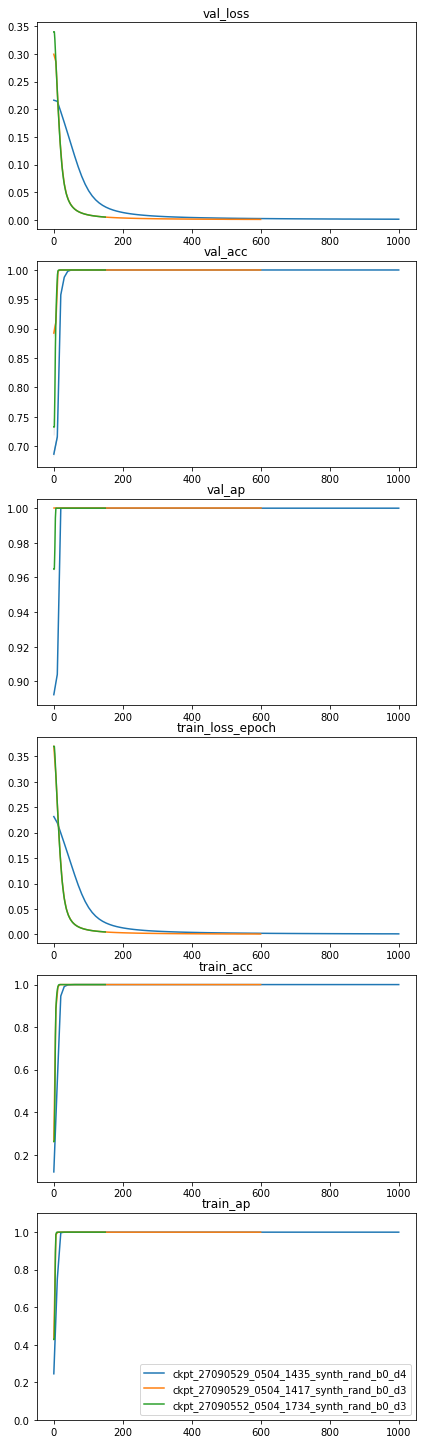

In [74]:
plot_agg_metrics(metrics_to_plot, 
                 metrics_paths, checkpoints, nb_fold, 
                 name="rand_b1_b10_more_epochs")

In [91]:
import numpy as np
arr1=np.array([0,0,0,1,2,3])
idx=np.where(arr1==1)[0][-1]
arr1[idx:]

array([1, 2, 3])

In [104]:
idx_list=np.arange(20)
print(idx_list)
for i in range(1,20):
    idx_list[i] = idx_list[i-1] + idx_list[i]
idx_list=idx_list-1
idx_list[1:]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([  0,   2,   5,   9,  14,  20,  27,  35,  44,  54,  65,  77,  90,
       104, 119, 135, 152, 170, 189])

In [103]:
range(1,19)

range(1, 19)